# Exploring Ford GoBike System Data
## by Laszlo Rado

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#reading in multiple data files (representing each month of year 2019)
#than concatenating them into one master dataframe
path = './/data//'
filelist = os.listdir(path)
bikes_master = pd.DataFrame()



for file in filelist:
    df = pd.read_csv(path + file, infer_datetime_format=True, parse_dates=['start_time', 'end_time'])
    bikes_master = pd.concat([bikes_master, df])
    print(file + ", " + str(bikes_master.shape))

201901-fordgobike-tripdata.csv, (192082, 14)
201902-fordgobike-tripdata.csv, (375494, 14)
201903-fordgobike-tripdata.csv, (631793, 14)
201904-fordgobike-tripdata.csv, (870904, 14)
201905-baywheels-tripdata.csv, (1053067, 14)


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201906-baywheels-tripdata.csv, (1244839, 15)


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201907-baywheels-tripdata.csv, (1502941, 15)
201908-baywheels-tripdata.csv, (1713504, 15)
201909-baywheels-tripdata.csv, (1931490, 15)
201910-baywheels-tripdata.csv, (2171385, 15)
201911-baywheels-tripdata.csv, (2356881, 15)


C:\ProgramData\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


201912-baywheels-tripdata.csv, (2506983, 15)


Looking at the progression of the dataframe's shape in the above prints, we can see that **some files have 14 some have 15 columns.**

The shape expands to 15 columns at 201906-baywheels-tripdata.csv, so opening this file and the previous in the list in Microsoft Excel, we can observe that the additional column is **rental_access_method**

We can also confirm it with the .info method below. We can see the number of non-null values are significantly lower.

In [3]:
#Observing column names, and content of the first 5 row to get a sense about the data
bikes_master.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [4]:
bikes_master.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506983 entries, 0 to 150101
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2506983 non-null  int64         
 1   start_time               2506983 non-null  datetime64[ns]
 2   end_time                 2506983 non-null  datetime64[ns]
 3   start_station_id         2426249 non-null  float64       
 4   start_station_name       2426850 non-null  object        
 5   start_station_latitude   2506983 non-null  float64       
 6   start_station_longitude  2506983 non-null  float64       
 7   end_station_id           2424081 non-null  float64       
 8   end_station_name         2424633 non-null  object        
 9   end_station_latitude     2506983 non-null  float64       
 10  end_station_longitude    2506983 non-null  float64       
 11  bike_id                  2506983 non-null  int64         
 12  u

In [5]:
#Observing number of unique values for each column to understand variation of entries
#and see if any of them can be converted to category datatype
bikes_master.nunique()

duration_sec                 15280
start_time                 2502104
end_time                   2502105
start_station_id               436
start_station_name             446
start_station_latitude       74719
start_station_longitude      75943
end_station_id                 436
end_station_name               446
end_station_latitude         76905
end_station_longitude        77995
bike_id                      11070
user_type                        2
bike_share_for_all_trip          2
rental_access_method             2
dtype: int64

In [6]:
bikes_master.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [7]:
#See whether there are any duplicated rows
bikes_master.duplicated().sum()

0

### Data Assesment

#### Quality:
    1) DONE - rental_access_method column only included in some of the files, has a large number of missing values
    2) DONE - start_station_id datatype is float
    3) DONE - end_station_id datatype is float
    4) DONE - bike_share_for_all_trip datatype is Object(String)
    5) DONE - user_type datatype is Object(String)
    6) DONE - start_station_id column has missing values
    7) DONE - start_station_name has missing values
    8) DONE - end_station_id has missing values
    9) DONE - end_station_name has missing values
    10) DONE - bike_share_for_all_trip column has missing values
        
#### Titiness:
    no tidiness issues observed

## Data Cleaning

In [8]:
#Make a copy of the master dataframe
bikes_clean = bikes_master.copy()

### Define 1):

Drop rental_access_method column since this feature was not recorded in every month

### Code 1):

In [9]:
#apply .drop() function on the clean dataset to remove the 'rental_access_method' column.
bikes_clean.drop('rental_access_method', axis=1, inplace=True)

### Test 1):

In [10]:
#Check whether 'rental_access_method' column is included in the dataframe (response should be False if drop was succesful)
#Also List columnnames to visually observe the same.

print('rental_access_method' in bikes_clean.columns)
list(bikes_clean.columns)

False


['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'bike_share_for_all_trip']

### Define 2):

There are missing values in the station id columns: 
start_station_id, start_station_name, end_station_id, end_station_name

See if we can find 
        1) the missing ids based on station name, 
        2) and the missing station names based on staion is
        
To do that I'll create a lookup table with the unique station ids and station names
Than I'll use this lookup table to:
        a) fill in the start and end station name columns based on their respective station ids
        b) fill in the start and end station id columns based on their respective station names

### Code 2):

In [11]:
#Creating a lookup table for the start station names and ids
stations_start = bikes_clean.melt(id_vars='start_station_id', value_vars='start_station_name', 
                                  value_name='station_name')
stations_start.rename(columns={'start_station_id' : 'id'}, inplace=True)

#Creating a lookup table for the end station names and ids
stations_end = bikes_clean.melt(id_vars='end_station_id', value_vars='end_station_name', 
                                  value_name='station_name')
stations_end.rename(columns={'end_station_id' : 'id'}, inplace=True)

#Concatenating the two lookup table
stations = pd.concat([stations_start, stations_end])
                            
#Cleaning the lookup table
stations.drop('variable', axis=1, inplace=True)
stations.sort_values(by='id', inplace=True)
stations.reset_index(inplace=True, drop=True)
stations.drop_duplicates(inplace=True)
stations.dropna(inplace=True)

In [12]:
#Check whether we have any duplicated values in any of the columns
print(stations.duplicated(subset=['id']).sum())
print(stations.duplicated(subset=['station_name']).sum())
stations

10
0


,id,station_name
0,3.0,Powell St BART Station (Market St at 4th St)
71719,4.0,Cyril Magnin St at Ellis St
86097,5.0,Powell St BART Station (Market St at 5th St)
148218,6.0,The Embarcadero at Sansome St
210289,7.0,Frank H Ogawa Plaza
...,...,...
4849382,492.0,Webster St at Clay St
4849484,493.0,Folsom St at 7th St
4850232,494.0,Park Ave at Laurel Grove Ln
4850263,495.0,St James St at 9th St


In [13]:
#Check the records with duplicated ids
stations[stations['id'].duplicated(keep=False)]

,id,station_name
1109002,37.0,Folsom St at 2nd St
1109003,37.0,2nd St at Folsom St
3566247,234.0,Farnam St at Fruitvale Ave
3566248,234.0,Fruitvale Ave at International Blvd
3981327,277.0,W Julian St at N Morrison St
3981328,277.0,Morrison Ave at Julian St
4068279,289.0,5th St at Taylor St
4068286,289.0,N 3rd St at E Taylor St
4070587,290.0,George St at 1st St
4070588,290.0,Jackson St at N 1st St


In [14]:
#looks like in most cases, the duplicates are just different writing format of the same address
#There are some exceptions (id 393, 290), where I don't know which one is the orrect format, so I will keep the 1st
stations.drop_duplicates(subset=['station_name'], keep='first', inplace=True)
stations.reset_index(drop=True, inplace=True)
stations.drop_duplicates(subset=['id'], keep='first', inplace=True)
stations.reset_index(drop=True, inplace=True)

#Check if drop was correct
print(stations.duplicated(subset=['id']).sum())
print(stations.duplicated(subset=['station_name']).sum())

0
0


#### Standardizing
Filling in Null values, and standardizing station **names** and **ids**

filling in start and end station names based on start and end station id, from on the stations dataframe

Using inner join, this will drop records where we have both the name and the id missing.

In [15]:
#Standardizing station NAMES

#start_station_name
bikes_clean = bikes_clean.merge(stations, left_on='start_station_id', right_on='id', how='inner')
bikes_clean.drop(['start_station_name', 'id'], axis=1, inplace=True)
bikes_clean.rename(columns={'station_name' : 'start_station_name'}, inplace=True)

#end_station_name
bikes_clean = bikes_clean.merge(stations, left_on='end_station_id', right_on='id', how='inner')
bikes_clean.drop(['end_station_name', 'id'],  axis=1, inplace=True)
bikes_clean.rename(columns={'station_name' : 'end_station_name'}, inplace=True)

In [16]:
#Standardizing station IDs.

#start_station_id
bikes_clean = bikes_clean.merge(stations, left_on='start_station_name', right_on='station_name', how='inner')
bikes_clean.drop(['start_station_id', 'station_name'], axis=1, inplace=True)
bikes_clean.rename(columns={'id' : 'start_station_id'}, inplace=True)

#start_station_name
bikes_clean = bikes_clean.merge(stations, left_on='end_station_name', right_on='station_name', how='inner')
bikes_clean.drop(['end_station_id', 'station_name'], axis=1, inplace=True)
bikes_clean.rename(columns={'id' : 'end_station_id'}, inplace=True)

### Test 2):

In [17]:
bikes_clean[bikes_clean['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_station_name,end_station_name,start_station_id,end_station_id


In [18]:
#Check for missing values
bikes_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2407258
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_latitude   2407259 non-null  float64       
 4   start_station_longitude  2407259 non-null  float64       
 5   end_station_latitude     2407259 non-null  float64       
 6   end_station_longitude    2407259 non-null  float64       
 7   bike_id                  2407259 non-null  int64         
 8   user_type                2407259 non-null  object        
 9   bike_share_for_all_trip  2262979 non-null  object        
 10  start_station_name       2407259 non-null  object        
 11  end_station_name         2407259 non-null  object        
 12  

In [19]:
#start
bikes_clean = bikes_clean.merge(stations, left_on='start_station_id', right_on='id', how='inner')
bikes_clean.drop(['start_station_name', 'id'], axis=1, inplace=True)
bikes_clean.rename(columns={'station_name' : 'start_station_name'}, inplace=True)

In [20]:
#Check a few samples to see whether the update was correct
bikes_clean.sample(10)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,end_station_name,start_station_id,end_station_id,start_station_name
2015231,346,2019-03-01 18:34:00.360,2019-03-01 18:39:46.534,37.775235,-122.397437,37.783899,-122.408445,5164,Subscriber,No,Powell St BART Station (Market St at 5th St),80.0,5.0,Townsend St at 5th St
2216145,382,2019-11-02 18:01:33.915,2019-11-02 18:07:56.908,37.796471,-122.416858,37.804223,-122.401643,10072,Customer,No,Cruise Terminal at Pier 27,398.0,462.0,Leavenworth St at Broadway
293401,194,2019-01-25 07:52:01.712,2019-01-25 07:55:16.025,37.849595,-122.265569,37.852477,-122.270213,5129,Subscriber,No,Ashby BART Station,168.0,241.0,Alcatraz Ave at Shattuck Ave
141061,226,2019-03-21 20:18:50.327,2019-03-21 20:22:37.043,37.804562,-122.271738,37.809013,-122.268247,710,Subscriber,No,19th Street BART Station,7.0,182.0,Frank H Ogawa Plaza
762248,1038,2019-06-27 12:27:51.247,2019-06-27 12:45:10.239,37.786375,-122.404904,37.778768,-122.415929,3417,Customer,No,San Francisco Public Library (Grove St at Hyde...,3.0,43.0,Powell St BART Station (Market St at 4th St)
2353417,390,2019-09-05 13:28:51.267,2019-09-05 13:35:21.900,37.341132,-121.892844,37.350964,-121.902016,3079,Subscriber,No,Mission St at 1st St,357.0,288.0,2nd St at Julian St
2292317,2016,2019-12-19 09:10:24.592,2019-12-19 09:44:01.286,37.779488,-122.463142,37.789625,-122.400811,12456,Subscriber,NaN,Montgomery St BART Station (Market St at 2nd St),466.0,21.0,5th Ave at Anza St
1639515,1083,2019-04-06 18:03:41.734,2019-04-06 18:21:45.098,37.778650,-122.418230,37.756708,-122.421025,1453,Customer,No,Valencia St at 21st St,42.0,127.0,San Francisco City Hall (Polk St at Grove St)
1974896,497,2019-04-22 09:53:41.736,2019-04-22 10:01:58.953,37.791464,-122.391034,37.775880,-122.393170,1677,Subscriber,No,Berry St at 4th St,23.0,81.0,The Embarcadero at Steuart St
1889224,542,2019-10-03 10:55:58.968,2019-10-03 11:05:01.102,37.788300,-122.408531,37.797280,-122.398436,2857,Subscriber,No,Davis St at Jackson St,324.0,11.0,Union Square (Powell St at Post St)


In [21]:
#Check a few ids manually to see whether they are consistent in the name columns
bikes_clean.start_station_name[bikes_clean['start_station_id'] == 37.0].value_counts()

Folsom St at 2nd St    10532
Name: start_station_name, dtype: int64

### Define 3):
Data Type for the following columns need to be changed

**to integer:**
   
        1) start_station_id
        2) end_station_id
        
**to category:**

        3) bike_share_for_all_trip
        4) user_type

### Code 3):

In [22]:
#updating start and end station id columns to integer
bikes_clean[['start_station_id', 'end_station_id']] = bikes_clean[['start_station_id', 'end_station_id']].astype('int')

In [23]:
#updating bike_share_for_all_trip and user_type to category
bikes_clean[['bike_share_for_all_trip', 'user_type']] = bikes_clean[['bike_share_for_all_trip', 'user_type']].astype('category')

### Test 3):

In [24]:
#Check if data type updates were executed correctly
bikes_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407259 entries, 0 to 2407258
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2407259 non-null  int64         
 1   start_time               2407259 non-null  datetime64[ns]
 2   end_time                 2407259 non-null  datetime64[ns]
 3   start_station_latitude   2407259 non-null  float64       
 4   start_station_longitude  2407259 non-null  float64       
 5   end_station_latitude     2407259 non-null  float64       
 6   end_station_longitude    2407259 non-null  float64       
 7   bike_id                  2407259 non-null  int64         
 8   user_type                2407259 non-null  category      
 9   bike_share_for_all_trip  2262979 non-null  category      
 10  end_station_name         2407259 non-null  object        
 11  start_station_id         2407259 non-null  int32         
 12  

### Define 4):

bike_share_for_all_trip column has missing values

Column not important for the analysis, so I don't drop records. I also decided to not drop the column at this stage, as I might decide to use it later during the analysis. In that case, I'll re-evaluate this point.

### Define 5):
Creating separate columns for month name, month_number, weekday, day, hour etc to make the analysis later easier.

In [25]:
#Break up start_time column to make the analysis easier
bikes_clean['month_name_start']=bikes_clean['start_time'].dt.strftime('%b')
bikes_clean['month_number_start']=bikes_clean['start_time'].dt.month.astype(int)
bikes_clean['weekday_start']=bikes_clean['start_time'].dt.strftime('%a')
bikes_clean['day_start']=bikes_clean['start_time'].dt.day.astype(int)
bikes_clean['hour_start']=bikes_clean['start_time'].dt.hour

In [26]:
#Converting month and day names into order types
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ordered_month = pd.api.types.CategoricalDtype(ordered = True, categories = month_order)
bikes_clean['month_name_start'] = bikes_clean['month_name_start'].astype(ordered_month)

weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
ordered_weekday = pd.api.types.CategoricalDtype(ordered = True, categories = weekday_order)
bikes_clean['weekday_start'] = bikes_clean['weekday_start'].astype(ordered_weekday)



### Test 5):

In [27]:
bikes_clean.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,end_station_name,start_station_id,end_station_id,start_station_name,month_name_start,month_number_start,weekday_start,day_start,hour_start
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,37.775745,-122.213037,37.808894,-122.256460,4861,Subscriber,No,Grand Ave at Perkins St,229,196,Foothill Blvd at 42nd Ave,Jan,1,Thu,31,17
1,389,2019-01-31 18:00:04.711,2019-01-31 18:06:33.738,37.775745,-122.213037,37.775232,-122.224498,1305,Subscriber,No,Fruitvale BART Station,229,237,Foothill Blvd at 42nd Ave,Jan,1,Thu,31,18
2,321,2019-01-31 08:37:48.350,2019-01-31 08:43:09.425,37.775745,-122.213037,37.775232,-122.224498,5119,Subscriber,No,Fruitvale BART Station,229,237,Foothill Blvd at 42nd Ave,Jan,1,Thu,31,8
3,334,2019-01-30 08:34:48.540,2019-01-30 08:40:22.599,37.775745,-122.213037,37.775232,-122.224498,5067,Subscriber,No,Fruitvale BART Station,229,237,Foothill Blvd at 42nd Ave,Jan,1,Wed,30,8
4,329,2019-01-29 18:43:08.401,2019-01-29 18:48:37.753,37.775745,-122.213037,37.775232,-122.224498,4589,Subscriber,No,Fruitvale BART Station,229,237,Foothill Blvd at 42nd Ave,Jan,1,Tue,29,18


### What is the structure of your dataset?



    After cleaning up, we have 2407259 unique trips recorded in the combined dataset for 2019.
    Each trip is anonymized and includes the following columns with a mix of numeric, categorical and string data types.

        Trip Duration (seconds)
        Start Time and Date
        End Time and Date
        Start Station ID
        Start Station Name
        Start Station Latitude
        Start Station Longitude
        End Station ID
        End Station Name
        End Station Latitude
        End Station Longitude
        Bike ID
        User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

    Separate monthly data files were downloaded from the following url before combining them into 1 master dataframe:
    https://www.lyft.com/bikes/bay-wheels/system-data


### What is/are the main feature(s) of interest in your dataset?

       1) I will attempt to find out what are the busiest periods yearly, monthly, weekly and daily.
       
       2) What kind of different riding patterns the different user_groups does have?

       3) Are there any spatial relationships between the riding patterns?
  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

          1) Answer the first question I will need to use the week, day, and hour columns to break up the trips 
             into different periods.
          
          2) On top of the data features I will also use the Trip Duration column to reveal some patterns.
          
          3) I will also extend my analysis based on the latitude and longitudes to see whether there are any spatial 
             patterns in the data
          
          4) I will add the user_type to my variable to see how the different user types have different riding patterns.
          
          

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [28]:
bikes_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,start_station_id,end_station_id,month_number_start,day_start,hour_start
count,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06,2.407259e+06
mean,8.048171e+02,3.776938e+01,-1.223547e+02,3.776852e+01,-1.223505e+02,9.290408e+03,1.462493e+02,1.424856e+02,6.322958e+00,1.558986e+01,1.351664e+01
std,1.910718e+03,1.034811e-01,1.607865e-01,2.244698e-01,6.650935e-01,5.046242e+04,1.221971e+02,1.213367e+02,3.341744e+00,8.660494e+00,4.801285e+00
min,6.000000e+01,0.000000e+00,-1.224952e+02,0.000000e+00,-1.224952e+02,4.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.580000e+02,3.777003e+01,-1.224130e+02,3.777041e+01,-1.224116e+02,1.877000e+03,4.700000e+01,4.200000e+01,3.000000e+00,8.000000e+00,9.000000e+00
50%,5.690000e+02,3.778053e+01,-1.223984e+02,3.778076e+01,-1.223981e+02,3.727000e+03,1.040000e+02,1.010000e+02,6.000000e+00,1.500000e+01,1.400000e+01
75%,8.830000e+02,3.779539e+01,-1.222948e+02,3.779625e+01,-1.222948e+02,7.171000e+03,2.420000e+02,2.390000e+02,9.000000e+00,2.300000e+01,1.700000e+01
max,8.623000e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,9.984300e+05,4.980000e+02,4.980000e+02,1.200000e+01,3.100000e+01,2.300000e+01


### Distribution of user types
Let's look at how the number of rides are split between the different user types

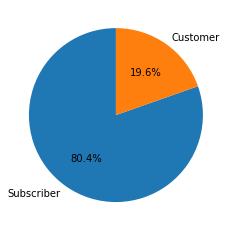

In [29]:
user_types = bikes_clean.user_type.value_counts()
plt.pie(user_types, startangle=90, labels=user_types.index, autopct='%.1f%%');


More than 80% of the users are subscribers, and only 20% are Customer.

Let's see how the length of the rides are distributed for the two user types to see whether we can observe any difference

### Distribution of Ride Lengths

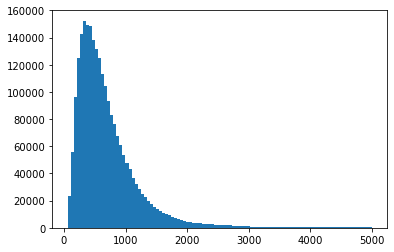

In [30]:
plt.hist(bikes_clean.query('duration_sec < 5000')['duration_sec'], bins=100);

The distribution is extremely skewed to the right, with the majority of the datapoints fall into the left extreme of the range, we still have a number of large and some extremely large values. This results in a very long tail to the left, which I had to cut off to focust more to the more dense areas to the plot.

Let's apply a log transformation on the data instead limiting the x axis.

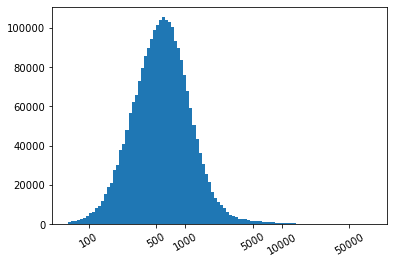

In [31]:
plt.hist(np.log10(bikes_clean['duration_sec']), bins=100);

#Creating more readable tick labels for the log transformed x-axes
tick_locs = [100, 500, 1000, 5000, 10000, 50000]
plt.xticks(np.log10(tick_locs), tick_locs, rotation=30);

I've applied log transformation on the data so that I can observe the full dataset without limiting the x axis.
Also after the log transformation the data resembles a normal distribution much more.

We can read that the typical bike ride takes around 10 minuts (5-700 seconds), with some very short, and some xtremely long rides up to 24hours hours (~8600sec)

Let's now visualize the summary statistis for the same distribution

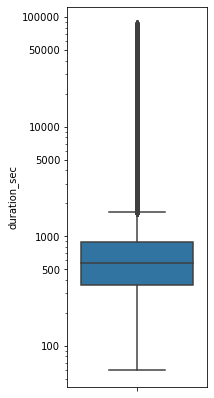

In [32]:
#Setting figure size and aspect
f, ax = plt.subplots(figsize=(2.5, 7))

#Applying log transformation on axes
ax.set_yscale("log")
sb.boxplot(y=bikes_clean['duration_sec'])

#Creating more readable tick labels for the log transformed x-axes
tick_locs = [100, 500, 1000, 5000, 10000, 50000, 100000]
plt.yticks(tick_locs, tick_locs);

I've applied a log transformation on the boxplot as well, for the same reason.
The above boxplot reinforces our observation. The typical ride length falls slightly above 500sec.
The majority of the rides falls between 250 and 900 seconds (4-10 minutes), and the typical ride is not longer 2000 seconds (~30min).
We also see that we have a number of extreme outlyers ranging up until 80-90k sec (24h).

This means, the average user uses the service for tipically short rides.


After understanding the distribution of the ride length, let's now take a look at how the number of rides are distributed across different timeframes.

### Time distributions

First let's look at number of rides over months.
##### Rides over months

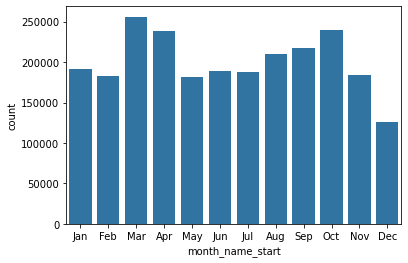

In [33]:
base_color = sb.color_palette()[0]
sb.countplot(bikes_clean['month_name_start'], order=month_order, color=base_color);

December is clearly the lowerst month during the year in terms of the number of bike rides.
This is winter when people are less likely to jump on a bike, and also Holiday season when people who normally uses the service for commuting, are using the service less.

We cal also see a big spike in March and April (early summer), and Aug-Sept-October (fall / late summer) making a bimodal distribution.
It is interesting though that the usage rates are lower during summer. This might be explained by the numer of summer holidays.

##### Rides over weekdays

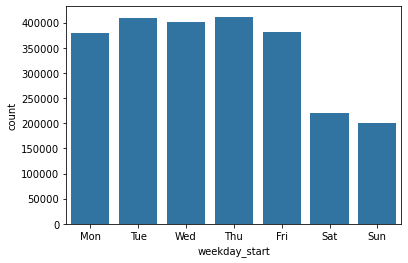

In [34]:
sb.countplot(bikes_clean['weekday_start'], order=weekday_order, color=base_color);

Numbers are significantly lower during the weekend, this further reinforces the idea that most people is using the service for commuting.

##### Rides over the hours of day

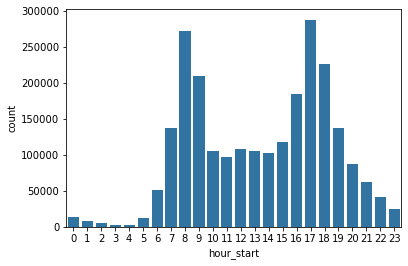

In [35]:
sb.countplot(bikes_clean['hour_start'], color=base_color);

We can observe two significant spikes during the early morning (7-8-9) and late afternoon (16-17-18) hours.
This is the typical rush our of going to and coming from work.
Between the two spikes the riding rates are much more modest, with minimal number of rides during dawn, and tailing off during the evening.

The above visualization again reinforces the idea that most people is using the service for commuting

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**Roughly 80% of the users are fall into the Subscriber user group, while the rest of the users are Customers.**

The distribution of the ride length is heavily right skewed with the majority of the points fall onto the left side of the x-axes with an extreme long tail to the left, so **I have applied log transformation on the ride length.**
After the log transformation the disribution resembles a normal distribution. Going forward I'll use this log transformed version of the ride lengths for the rest of the visualizations.

We can read both from the above histogram, and boxplot that the typical ride length falls slightly above 500sec.
The majority of the rides falls between 250 and 900 seconds (4-10 minutes) any only a small portion exceeds 2000seconds (30 min)

**This means, the average user uses the service for tipically short rides.**

We can observ that the busy periods are the weekdays, especially during the morning and evening rush hours (forming a very clear bi-modal distribution).

December has the lowest and the months before (March-April) and after summer (Aug-Oct-Sept) has the highest usage rates.


**all the above suggests that most users are using the service for commuting to work**


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I've applied log transformation on the ride duration, because the distribution was heavily right skewed with a very long tail to the right. It was difficult to observ the data and understand the denser areas without limiting the x-axis due to the outliers and small amount of long duration ride.

After the transformation the data was much easier to observ and formed a shape more closer to normal.

I've also calculated month, weekday and hour columns from the start time data to make the analysis easier.

The date required some cleaning as well. Handling null values and using appropriate data types which was documented as part of the data wrangling process above.

## Bivariate Exploration

> Let's look at the previous graphs, but split them into two parts by the user_type column

##### distribution of the ride duration

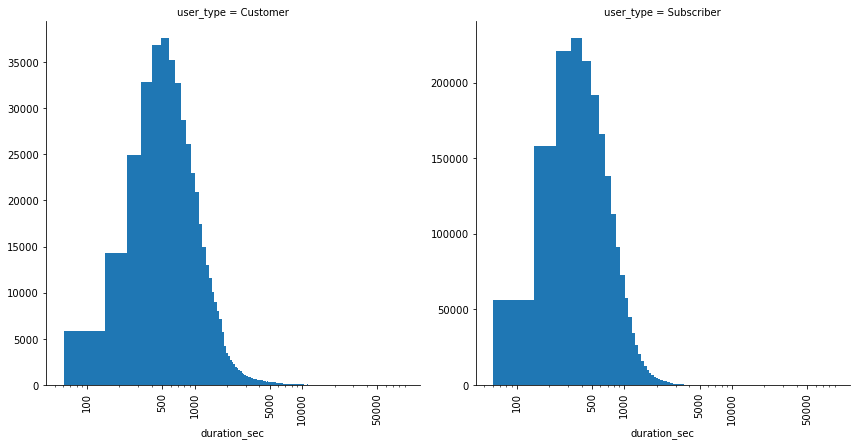

In [36]:
base_color= sb.color_palette()[0]
g = sb.FacetGrid(data = bikes_clean, col = 'user_type', margin_titles = True, 
                 height=6, sharey=False)
g.map(plt.hist, 'duration_sec', bins=1000).set(xscale = 'log')
g.set_xticklabels(rotation=90)

tick_locs = [100, 500, 1000, 5000, 10000, 50000]
g.set(xticks = tick_locs, xticklabels = tick_locs);

> Note that the two distribution does not share their Y-axes. The Subsriber groups distribution is reaching much higher.

The sape of the two distributions are are similar, both have its mode around 500-700seconds, but Customer user type is more likely to take longer rides. It tail goes over the 10000second mark, while for the the Subscriber type it fades avay around 3500. Also the mode looks higer as well.

Let's create a boxplot so that we can read these summary numbers about the distribution easier.

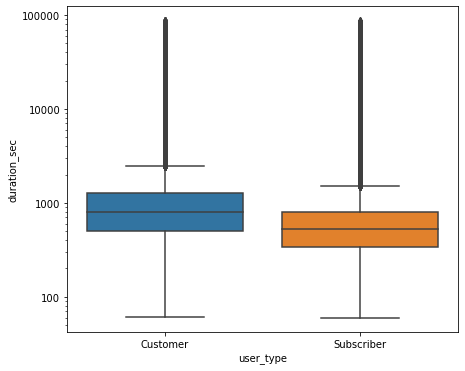

In [37]:
f, ax = plt.subplots(figsize=(7, 6))

tick_locs = [100, 1000, 10000, 100000]
ax.set_yscale("log")
sb.boxplot(x=bikes_clean['user_type'], y=bikes_clean['duration_sec'])
plt.yticks(tick_locs, tick_locs);

We can confirm our earlier observation. 
Both the median, and the complete interquartile range is higher for the customers than for the subscribers.

> So subsribers tend to use the service for somewhat shorter periods than customers

After understanding how the ride length differs for the two user types, lets look at how the rides are distributed accross different timeframes.

### Time Distributions
##### number of rides over months:

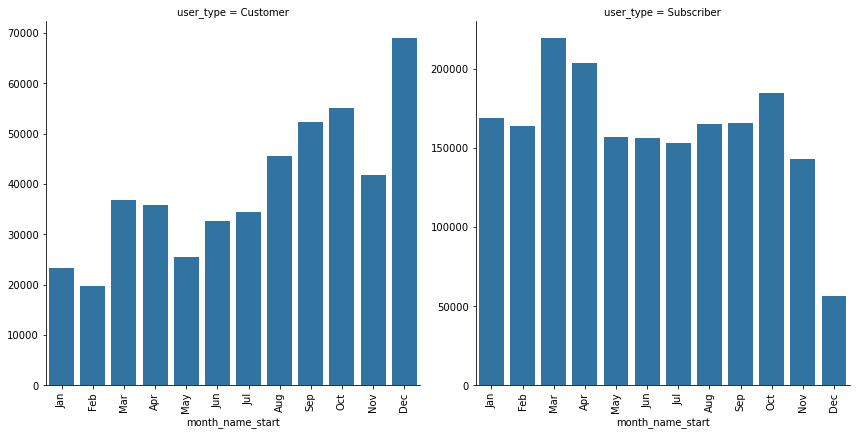

In [38]:
base_color= sb.color_palette()[0]
g = sb.FacetGrid(data = bikes_clean, col = 'user_type', margin_titles = True, height=6, sharey=False)
g.map(sb.countplot, 'month_name_start', order=month_order)
g.set_xticklabels(rotation=90);

**The two distributions are different.**
    
        1) December has the lowest usage rates for the subscribers but this is the most popular month for the 
           customer user group.
        2) Both distributions have peaks in the months before (March-April) and after (Aug-Sept-Oct) summer.
        3) Other than the above two points the usage rate is balanced accross the year for the subscribers, 
           while it is left skewed for the customer user group, with heavier usage towards the year end.
 
> The spikes and seasonality is much more pronounced in the customer group's chart, while the subsriber group's graph is more balanced.
      
##### number of rides over weekdays:

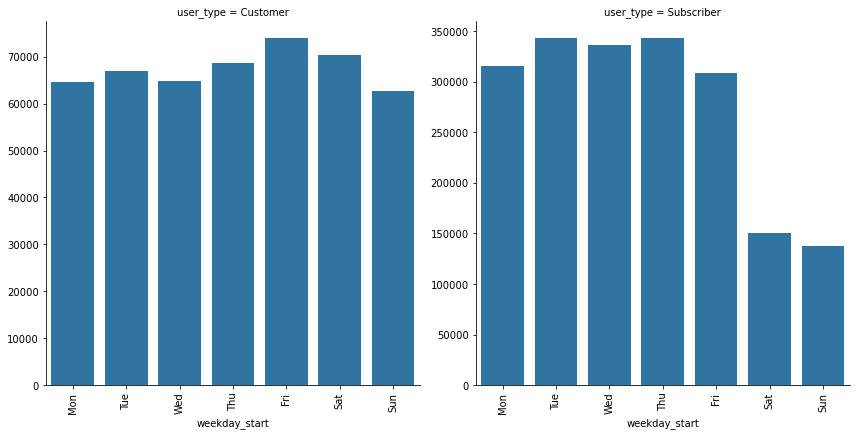

In [39]:
base_color= sb.color_palette()[0]
g = sb.FacetGrid(data = bikes_clean, col = 'user_type', margin_titles = True, height=6, sharey=False)
g.map(sb.countplot, 'weekday_start', order=weekday_order)
g.set_xticklabels(rotation=90);

**There are again differences in the distributions**
        
        1) The usage for the customer group is the highest over the weekend (Fri-Sat), but very balanced overall
        2) While there is a huge drop in the number of rides over the weekend for the Subscriber group
        
> the weekly usage for the subsribers is heavily focused towards the weekdays, while it is pretty balanced for the customers, with a light peak over the weekend.

##### number of rides over the hours of the day:

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


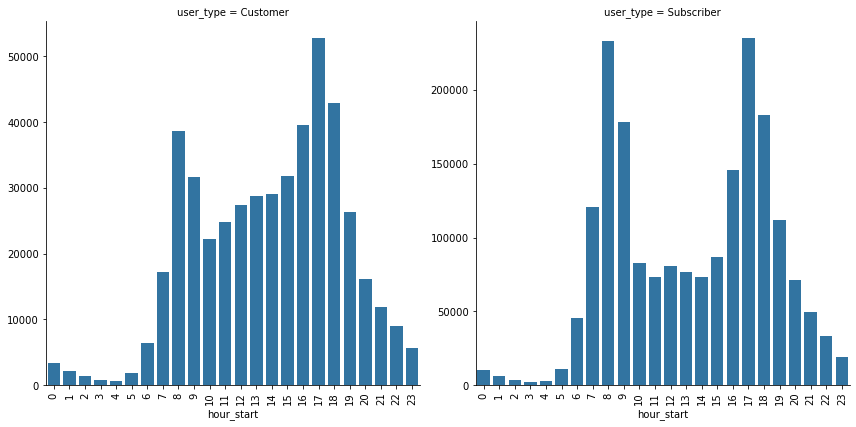

In [40]:
base_color= sb.color_palette()[0]
g = sb.FacetGrid(data = bikes_clean, col = 'user_type', margin_titles = True, height=6, sharey=False)
g.map(sb.countplot, 'hour_start')
g.set_xticklabels(rotation=90);

Both distributions are bi-modal with peaks during the morning and evening rush hours, and share some similarities overall, but we can observe differences in the patterns as well.

           1) The two modes of the subscriber's graph reaches exactly to the same height, while the morning mode for 
              the customer graph is significantly lower.
           2) Between the two modes the usage rate for the subsribers fall heavily, while it is not so heavy for 
              the customers.
              
> Subsribers use the bike to commute to work, and back, while customers are using it during the day as well.

### Let's summarize the above bar charts and histograms into one 2d histogram
Let's create a heatmap between the usage rate of the weekdays and the hour of the days

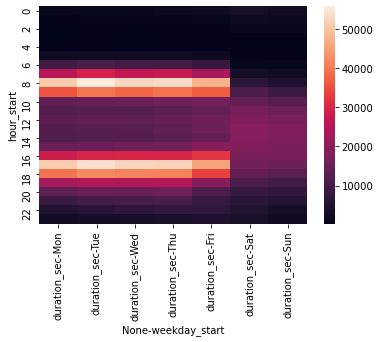

In [41]:
#First let's look at the heatmap for the Customer user group
bikes_subs = bikes_clean.query('user_type == "Customer"')

#Create the matrix for the heatmap between 'hour_start' and 'weekday_start' columns 
#with the counts of the rides as the values
bikes_heat = pd.DataFrame(bikes_clean.groupby(['hour_start', 'weekday_start'])['duration_sec'].count()).reset_index()
bikes_heat = bikes_heat.pivot(index='hour_start', columns='weekday_start')

#map the matrix with seaborns heatmap function
sb.heatmap(bikes_heat);

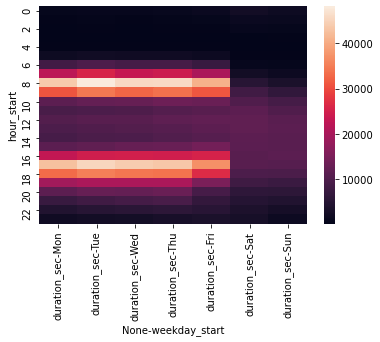

In [42]:
#Now let's create the same for the Subscribers as well
bikes_subs = bikes_clean.query('user_type != "Customer"')

#Creating the same matrix for the subsribers subgroup
bikes_subs = pd.DataFrame(bikes_subs.groupby(['hour_start', 'weekday_start'])['duration_sec'].count()).reset_index()
bikes_subs = bikes_subs.pivot(index='hour_start', columns='weekday_start')

#Plotting
sb.heatmap(bikes_subs);

The above heatmaps summarize the first 3 point below very well:

    1) the subsriber group uses the service much more (note the difference in range on the colobar)

    2) both groups uses the service during the morning and evening rush hours, but the drop in usage is more 
       proniunced between the peaks for the subscriber group.
    
    3) Usage rate over the weekend is higher for the customer group.
    
    4) We can't see this here, but we know from earlier that customers also tend to take longer rides and seasonality is 
       more pronounced in their usage patterns
    
Summarizing all this we can say:
    
   >Subsribers are mainly using the service for commute to work
   
   >There are much more casual, fun-riders and tourists among the customer user group
   

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Introducing the user_group variable to the distributions revealed some further patterns, which lead to the conclusion that subsribers are mainly using the service for commute to work and there are much more casual, fun-riders and tourists among the customer user group

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let's look at whether there are any spatial relationship between the usage patterns of the two groups

### Spatial relationships

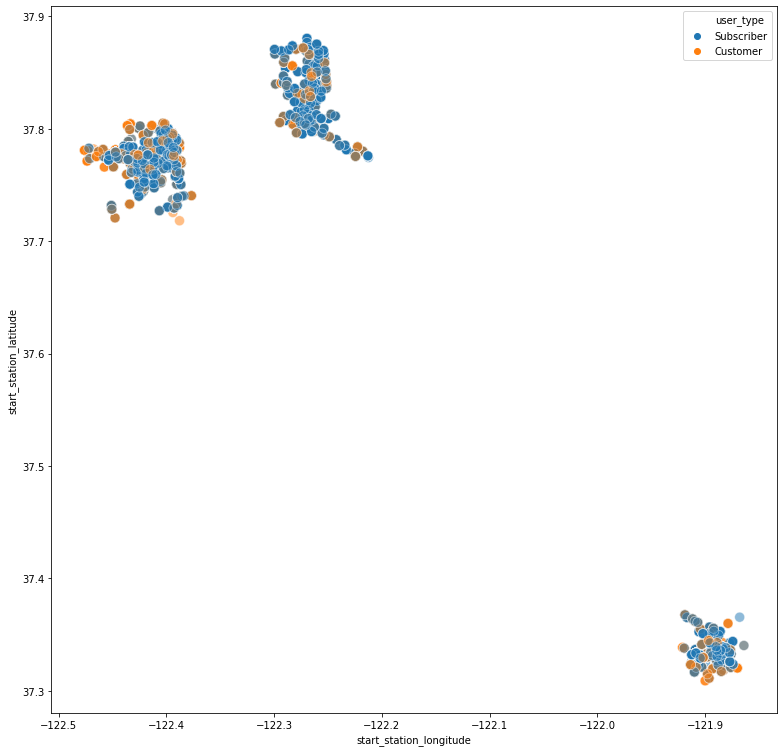

In [51]:
f, ax = plt.subplots(figsize=(13, 13))
sb.scatterplot(data=bikes_clean.sample(100000, random_state=42), x = 'start_station_longitude', y = 'start_station_latitude', 
              s=100, alpha=0.5, hue='user_type');

>The above pot had to be downsampled to avoid overplotting. Applying jitter and transparency was not enoungh to make the chart readable.

It looks like that the left-most cluster has the most orange markers (customer group), but the difference is a bit hard to tell.

But luckily the points form 3 very clear clsters, which we can separate in the data by reading the longitude values from the x axis of the chart.

**Let's add an additional column to our database to separate the clusters**

In [44]:
#Read boarders between the clusters from the above scatter plot
border_1 = -122.45
border_2 = -122.15

#Create function that calculates which records falls into which area
def split_area(x):
    border_1 = -122.35
    border_2 = -122.15
    if x < border_1:
        return 1
    elif x < border_2:
        return 2
    else: return 3

#create new column by applying the split_area() function created above
bikes_clean['area'] = bikes_clean.start_station_longitude.apply(lambda x: split_area(x))

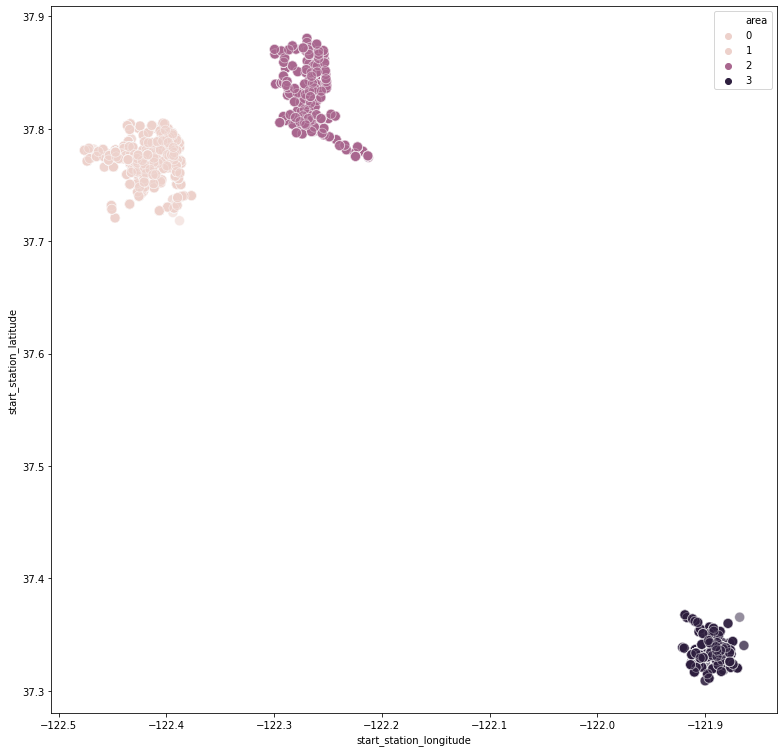

In [52]:
#plotting the same scatter, now with hue on the new area column to see whether we separated the data correctly
f, ax = plt.subplots(figsize=(13, 13))
sb.scatterplot(data=bikes_clean.sample(100000, random_state=42), x = 'start_station_longitude', y = 'start_station_latitude', 
              s=100, alpha=0.5, hue='area');

Let's look at whether there are any differences between usage rates of these areas

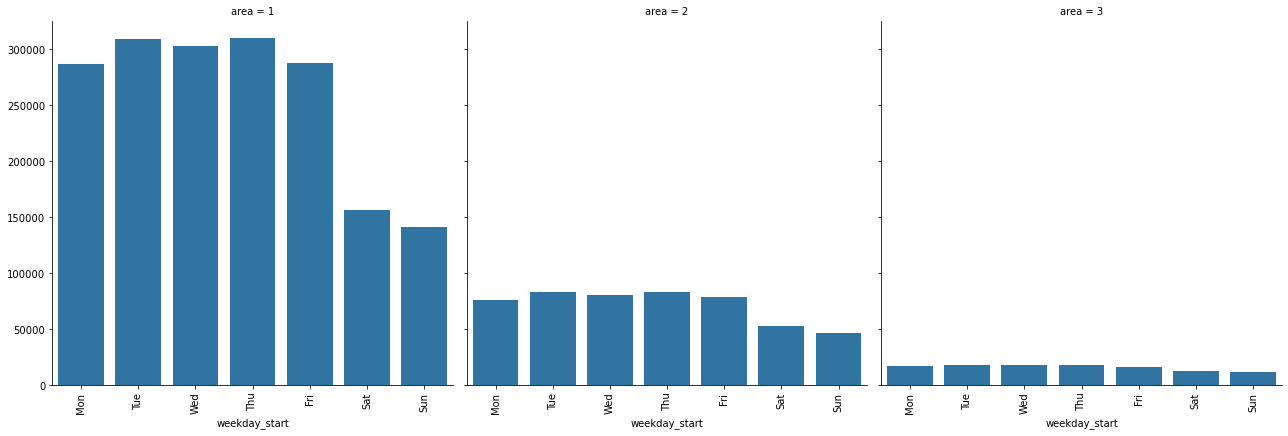

In [46]:
#Let's look at how the number of rides differ between the three areas
g = sb.FacetGrid(data = bikes_clean, col = 'area', margin_titles = True, height=6, sharey=True)
g.map(sb.countplot, 'weekday_start', order=weekday_order)
g.set_xticklabels(rotation=90);

We can see that there are hugde differences between the number of rides there. Area 1 takes by far the largest and area 3 the smallest amount of trips. Let's try to reveal some further differences by adding the user_group variable

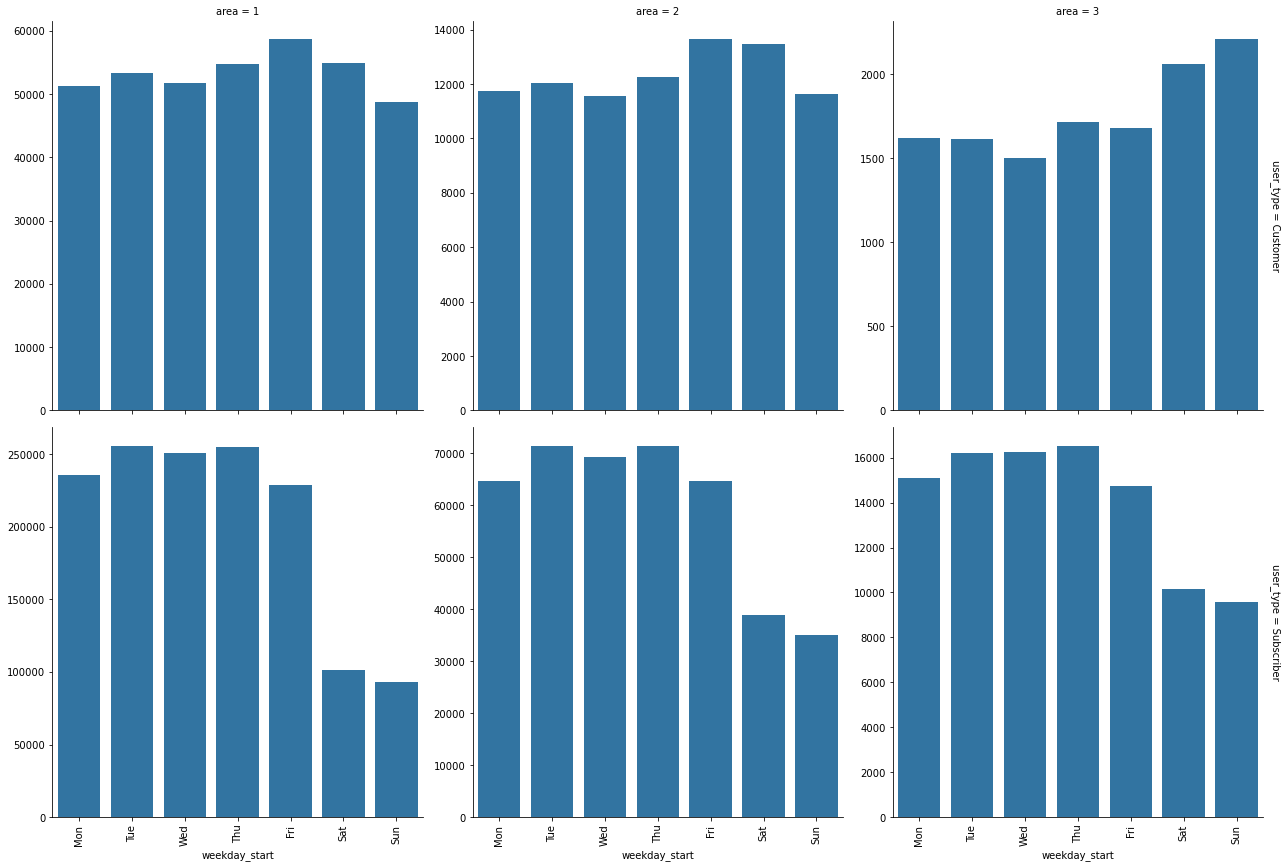

In [47]:
base_color= sb.color_palette()[0]
g = sb.FacetGrid(data = bikes_clean, col = 'area', row='user_type', margin_titles = True, height=6, sharey=False)
g.map(sb.countplot, 'weekday_start', order=weekday_order)
g.set_xticklabels(rotation=90);

if we let each separat chart take it's own y-axes we can see that although the shapes of the distributions are similar in all three regions, area three a bit more popular over the weekend than the others... it might be more of a recreational area than the other two region

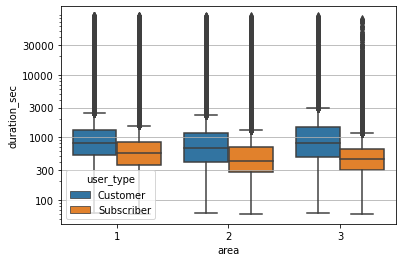

In [48]:
ax = sb.boxplot(x="area", y="duration_sec", hue='user_type', data=bikes_clean)
ax.set_yscale("log")
ax.yaxis.grid(True)
tick_locs = [100, 300, 1000, 3000, 10000, 30000]
plt.yticks(tick_locs, tick_locs);

If we compare average ride durations between the three area and the user_groups we can see customers indeed taking longer trips typically, we can also see that the rides are even longer for the customers in this area, while they are shorter for the subscriber group than in area 1 or 2.

Finally let's look at the proportion of customers per region

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


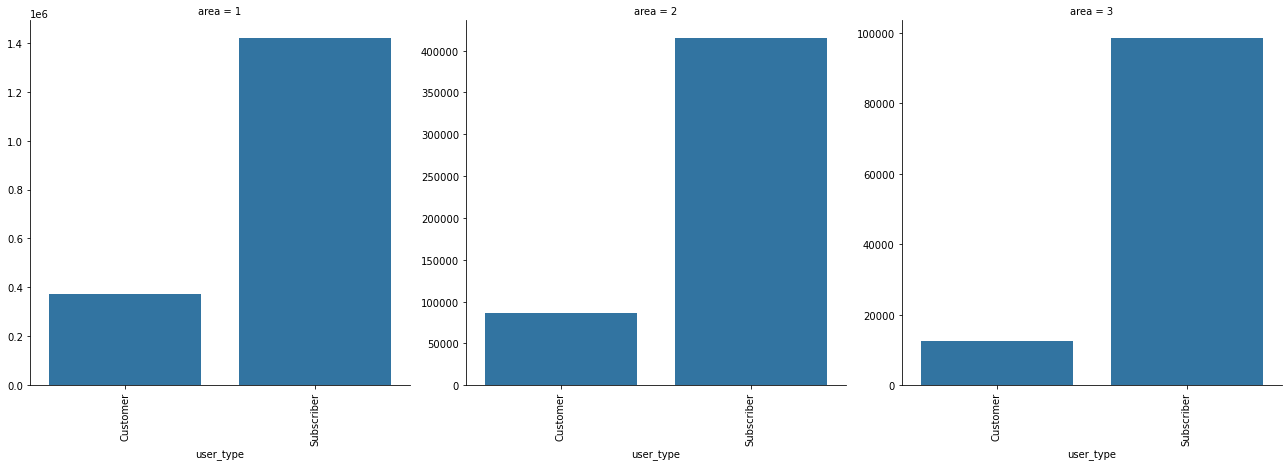

In [49]:
g = sb.FacetGrid(data = bikes_clean, col = 'area', margin_titles = True, height=6, sharey=False)
g.map(sb.countplot, 'user_type')
g.set_xticklabels(rotation=90);

The proportion of customers is the smallest in area 3, counterin the idea that this being more recreational that the others

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> During the multivaria analysis we reveled that there are three main area where the bike sharing system's stations are located. There are slight differences in the trip length and in the proportion of customers / subsribers, but the only significant variation can be observed between the number of rides between these areas.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [50]:
if False:
    bikes_clean.to_csv('bike_clean.csv')